# Analysis of results from multiple reference/citation of public medical image datasets in scientific papers from different venues

## Loading of results

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
papers_info = pd.read_csv("../../Results/extraction/papers_infos_openalex.csv")
df_oa_reference_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_reference.csv")
df_oa_reference_allInfo["year"] = papers_info["year"]
df_oa_reference_allInfo["venue"] = papers_info["venue"]
df_oa_reference_allInfo = df_oa_reference_allInfo[(df_oa_reference_allInfo["year"]>2010) & (df_oa_reference_allInfo["year"]<2023)]

df_oa_abstract_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_abstract.csv")
df_oa_abstract_allInfo["year"] = papers_info["year"]
df_oa_abstract_allInfo["venue"] = papers_info["venue"]
df_oa_abstract_allInfo = df_oa_abstract_allInfo[(df_oa_abstract_allInfo["year"]>2010) & (df_oa_abstract_allInfo["year"]<2023)]

fulltext_abstract_info = pd.read_csv("../../Results/extraction/fulltext_datasets_abstract.csv")


datasets_columns = df_oa_reference_allInfo.columns.difference(['doi','name','venue','year'])

## Dataviz using only OpenAlex

### Number of presence in references by dataset

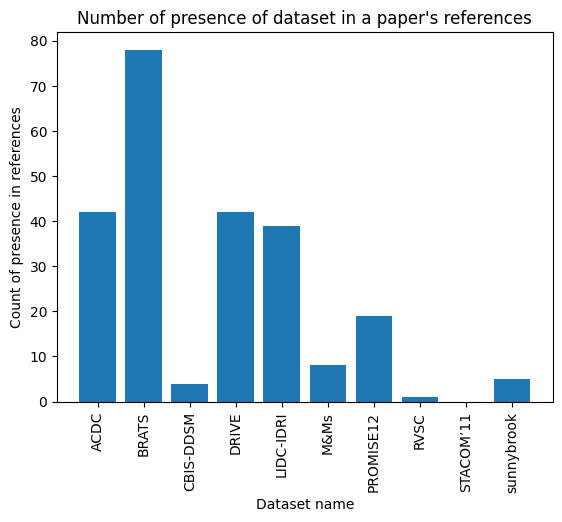

ACDC          42
BRATS         78
CBIS-DDSM      4
DRIVE         42
LIDC-IDRI     39
M&Ms           8
PROMISE12     19
RVSC           1
STACOM’11      0
sunnybrook     5
dtype: int64

In [7]:
df_oa_reference_toplot = df_oa_reference_allInfo[datasets_columns]
plt.figure()
plt.bar(datasets_columns,df_oa_reference_toplot.sum())
plt.xticks(datasets_columns, rotation='vertical')
plt.xlabel("Dataset name")
plt.ylabel("Count of presence in references")
plt.title("Number of presence of dataset in a paper's references")
plt.show()
df_oa_reference_toplot.sum()

Comments:

### Number of presence in references by dataset and venues

<Figure size 640x480 with 0 Axes>

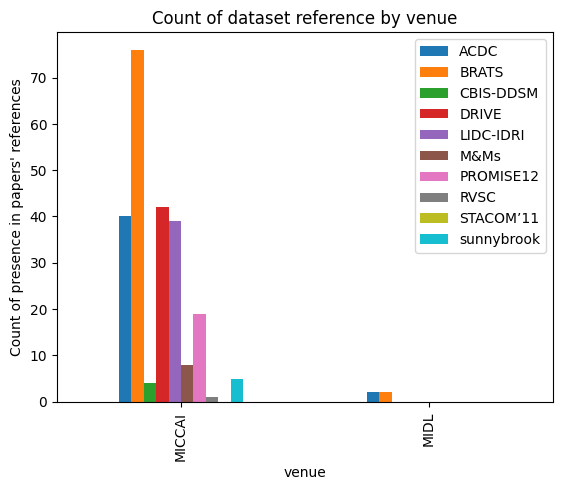

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
venue,,,,,,,,,,
MICCAI,40,76,4,42,39,8,19,1,0,5
MIDL,2,2,0,0,0,0,0,0,0,0


In [6]:
df_oa_reference_toplot = df_oa_reference_allInfo[df_oa_reference_allInfo.columns.difference(['doi','name','year'])]
#groupby_venues = df_oa_abstract_toplot[["venue","ACDC"]].groupby("venue").sum()
count_per_dataset_and_venue = df_oa_reference_toplot.groupby("venue").sum()
plt.figure()
t = count_per_dataset_and_venue.plot.bar()
plt.ylabel("Count of presence in papers' references")
plt.title("Count of dataset reference by venue")
plt.show()
count_per_dataset_and_venue

### Number of presence in references by dataset and years

<Figure size 640x480 with 0 Axes>

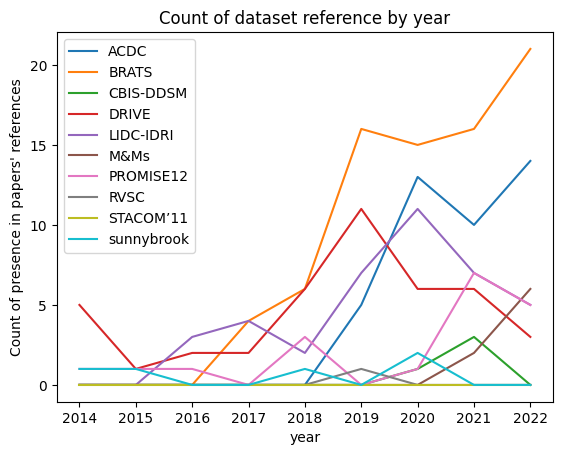

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
year,,,,,,,,,,
2014.0,0,0,0,5,0,0,1,0,0,1
2015.0,0,0,0,1,0,0,1,0,0,1
2016.0,0,0,0,2,3,0,1,0,0,0
2017.0,0,4,0,2,4,0,0,0,0,0
2018.0,0,6,0,6,2,0,3,0,0,1
2019.0,5,16,0,11,7,0,0,1,0,0
2020.0,13,15,1,6,11,0,1,0,0,2
2021.0,10,16,3,6,7,2,7,0,0,0
2022.0,14,21,0,3,5,6,5,0,0,0


<Figure size 640x480 with 0 Axes>

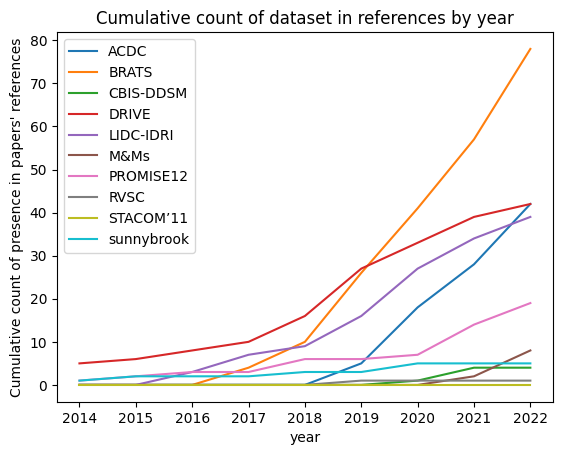

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
year,,,,,,,,,,
2014.0,0,0,0,5,0,0,1,0,0,1
2015.0,0,0,0,6,0,0,2,0,0,2
2016.0,0,0,0,8,3,0,3,0,0,2
2017.0,0,4,0,10,7,0,3,0,0,2
2018.0,0,10,0,16,9,0,6,0,0,3
2019.0,5,26,0,27,16,0,6,1,0,3
2020.0,18,41,1,33,27,0,7,1,0,5
2021.0,28,57,4,39,34,2,14,1,0,5
2022.0,42,78,4,42,39,8,19,1,0,5


In [14]:
df_oa_reference_toplot = df_oa_reference_allInfo[df_oa_reference_allInfo.columns.difference(['doi','name','venue'])]
count_per_dataset_and_venue = df_oa_reference_toplot.groupby("year").sum()
plt.figure()
t = count_per_dataset_and_venue.plot()
plt.ylabel("Count of presence in papers' references")
plt.title("Count of dataset reference by year")
plt.show()
display(count_per_dataset_and_venue)

cumulcount_per_dataset_and_venue = count_per_dataset_and_venue.cumsum()
plt.figure()
cumulcount_per_dataset_and_venue.plot()
plt.ylabel("Cumulative count of presence in papers' references")
plt.title("Cumulative count of dataset in references by year")
plt.show()
display(cumulcount_per_dataset_and_venue)


### Number of presence in abstract by dataset

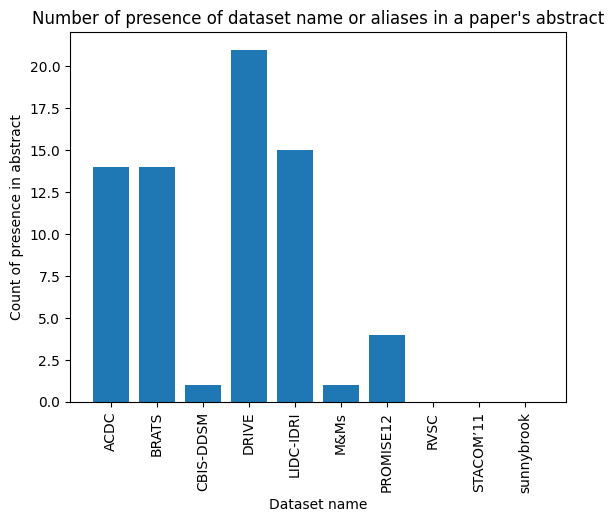

ACDC          14
BRATS         14
CBIS-DDSM      1
DRIVE         21
LIDC-IDRI     15
M&Ms           1
PROMISE12      4
RVSC           0
STACOM’11      0
sunnybrook     0
dtype: int64

In [15]:
df_oa_abstract_toplot = df_oa_abstract_allInfo[df_oa_abstract_allInfo.columns.difference(['doi', 'name','venue','year'])]
plt.figure()
plt.bar(datasets_columns,df_oa_abstract_toplot.sum())
plt.xticks(datasets_columns, rotation='vertical')
plt.xlabel("Dataset name")
plt.ylabel("Count of presence in abstract")
plt.title("Number of presence of dataset name or aliases in a paper's abstract")
plt.show()
display(df_oa_abstract_toplot.sum())

Comments:

### Number of presence in abstract by dataset and venues

<Figure size 640x480 with 0 Axes>

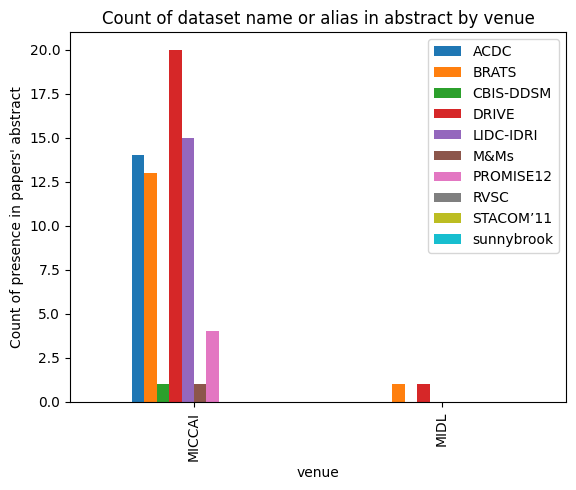

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
venue,,,,,,,,,,
MICCAI,14,13,1,20,15,1,4,0,0,0
MIDL,0,1,0,1,0,0,0,0,0,0


In [3]:
datasets_columns = df_oa_abstract_allInfo.columns.difference(['doi','name','venue','year'])
df_oa_abstract_toplot = df_oa_abstract_allInfo[df_oa_abstract_allInfo.columns.difference(['doi','name','year'])]
count_per_dataset_and_venue = df_oa_abstract_toplot.groupby("venue").sum()
plt.figure()
t = count_per_dataset_and_venue.plot.bar()
plt.ylabel("Count of presence in papers' abstract")
plt.title("Count of dataset name or alias in abstract by venue")
plt.show()
count_per_dataset_and_venue

### Number of presence in references by dataset and years

<Figure size 640x480 with 0 Axes>

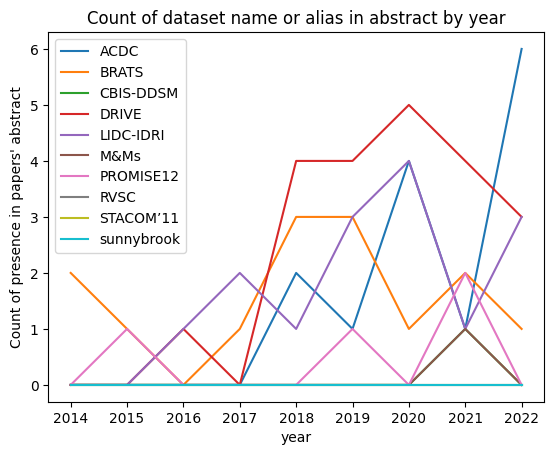

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
year,,,,,,,,,,
2014.0,0,2,0,0,0,0,0,0,0,0
2015.0,0,1,0,0,0,0,1,0,0,0
2016.0,0,0,0,1,1,0,0,0,0,0
2017.0,0,1,0,0,2,0,0,0,0,0
2018.0,2,3,0,4,1,0,0,0,0,0
2019.0,1,3,0,4,3,0,1,0,0,0
2020.0,4,1,0,5,4,0,0,0,0,0
2021.0,1,2,1,4,1,1,2,0,0,0
2022.0,6,1,0,3,3,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

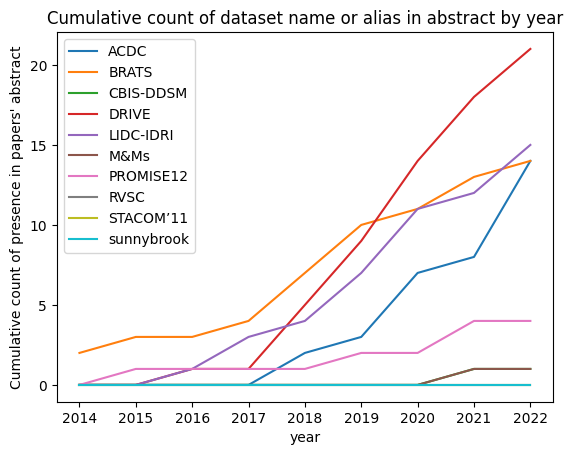

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
year,,,,,,,,,,
2014.0,0,2,0,0,0,0,0,0,0,0
2015.0,0,3,0,0,0,0,1,0,0,0
2016.0,0,3,0,1,1,0,1,0,0,0
2017.0,0,4,0,1,3,0,1,0,0,0
2018.0,2,7,0,5,4,0,1,0,0,0
2019.0,3,10,0,9,7,0,2,0,0,0
2020.0,7,11,0,14,11,0,2,0,0,0
2021.0,8,13,1,18,12,1,4,0,0,0
2022.0,14,14,1,21,15,1,4,0,0,0


In [16]:
datasets_columns = df_oa_abstract_allInfo.columns.difference(['doi','name','venue','year'])
df_oa_abstract_toplot = df_oa_abstract_allInfo[df_oa_abstract_allInfo.columns.difference(['doi','name','venue'])]
count_per_dataset_and_venue = df_oa_abstract_toplot.groupby("year").sum()
plt.figure()
count_per_dataset_and_venue.plot()
plt.ylabel("Count of presence in papers' abstract")
plt.title("Count of dataset name or alias in abstract by year")
plt.show()
display(count_per_dataset_and_venue)

cumulcount_per_dataset_and_venue = count_per_dataset_and_venue.cumsum()
plt.figure()
cumulcount_per_dataset_and_venue.plot()
plt.ylabel("Cumulative count of presence in papers' abstract")
plt.title("Cumulative count of dataset name or alias in abstract by year")
plt.show()
display(cumulcount_per_dataset_and_venue)

### Dataviz, combination abstract and references

Text(0.5, 1.0, 'Number of time a dataset is cited both in the abstract and references')

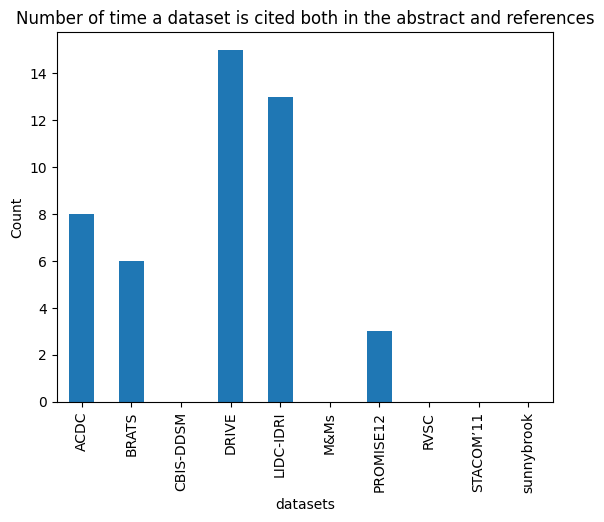

In [81]:
t1=df_oa_reference_allInfo[datasets_columns]
t2=df_oa_abstract_allInfo[datasets_columns]
plt.figure()
(t1&t2).sum().plot.bar()
plt.xlabel("datasets")
plt.ylabel("Count")
plt.title("Number of time a dataset is cited both in the abstract and references")

In [97]:
from matplotlib_venn import venn2
number_references = sum(t1.sum())
number_abstract = sum(t2.sum())
number_of_papers = len(t1)
intersection = sum((t1&t2).sum())

238 70 45


Text(0.5, 1.0, 'Venn diagram of reference or citation')

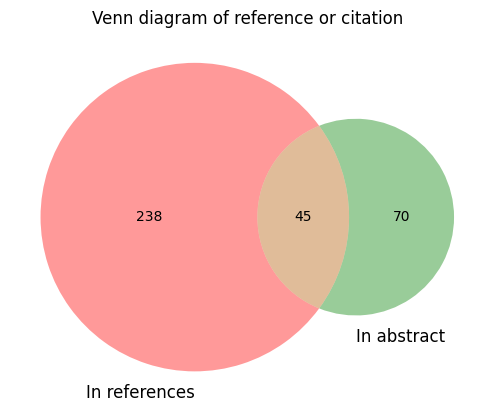

In [102]:
print(number_references,number_abstract,intersection)
plt.figure()
venn2(subsets = (number_references,number_abstract,intersection),set_labels=["In references","In abstract"])
plt.title("Venn diagram of reference or citation")

## Combine OpenAlex and Fulltext

In [75]:
common_papers = fulltext_abstract_info.merge(df_oa_abstract_allInfo,left_on="name",right_on="name")["name"]
fulltext_abstract_info[~(fulltext_abstract_info["name"].isin(common_papers))]

,name,ACDC,sunnybrook,STACOM’11,RVSC,M&Ms,BRATS,PROMISE12,LIDC-IDRI,DRIVE,CBIS-DDSM
37,EPIC-Survival: End-to-end Part Inferred Cluste...,False,False,False,False,False,False,False,False,False,False
42,Learning the Latent Heat Diffusion Process thr...,False,False,False,False,False,False,False,False,False,False
64,Tailoring automated data augmentation to H&E-s...,False,False,False,False,False,False,False,False,False,False
70,Residual learning for 3D motion corrected quan...,False,False,False,False,False,False,False,False,False,False
77,"“Train one, Classify one, Teach one” - Cross-s...",False,False,False,False,False,False,False,False,False,False
89,Beyond pixel-wise supervision for segmentation...,False,False,False,False,False,False,False,False,False,False
102,Understanding Alzheimer disease’s structural c...,False,False,False,False,False,False,False,False,False,False
107,Red-GAN: Attacking class imbalance via conditi...,False,False,False,False,False,False,False,False,False,False
117,Correlation via Synthesis: End-to-end Image Ge...,False,False,False,False,False,False,False,False,False,False


In [76]:
combination = df_oa_abstract_allInfo[df_oa_abstract_allInfo["name"].isin(common_papers)][datasets_columns].reset_index(drop=True)|fulltext_abstract_info[fulltext_abstract_info["name"].isin(common_papers)][datasets_columns].reset_index(drop=True)

combination.index = common_papers
df_oa_abstract_allInfo_name = df_oa_abstract_allInfo.set_index(["name"])
df_oa_abstract_allInfo_name.update(combination)
df_oa_abstract_allInfo_name

,doi,ACDC,sunnybrook,STACOM’11,RVSC,M&Ms,BRATS,PROMISE12,LIDC-IDRI,DRIVE,CBIS-DDSM,year,venue
name,,,,,,,,,,,,,
ECONet: Efficient Convolutional Online Likelihood Network for Scribble-based Interactive Segmentation.,NaN,False,False,False,False,False,False,False,False,False,False,2022.0,MIDL
SMU-Net: Style matching U-Net for brain tumor segmentation with missing modalities.,NaN,False,False,False,False,False,False,False,False,False,False,2022.0,MIDL
On learning adaptive acquisition policies for undersampled multi-coil MRI reconstruction.,NaN,False,False,False,False,False,False,False,False,False,False,2022.0,MIDL
Negative Evidence Matters in Interpretable Histology Image Classification.,NaN,False,False,False,False,False,False,False,False,False,False,2022.0,MIDL
Interpretable and Interactive Deep Multiple Instance Learning for Dental Caries Classification in Bitewing X-rays.,NaN,False,False,False,False,False,False,False,False,False,False,2021.0,MIDL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Max-Margin Based Learning for Discriminative Bayesian Network from Neuroimaging Data,10.1007/978-3-319-10443-0_41,False,False,False,False,False,False,False,False,False,False,2014.0,MICCAI
Group-Wise Optimization of Common Brain Landmarks with Joint Structural and Functional Regulations,10.1007/978-3-319-10470-6_89,False,False,False,False,False,False,False,False,False,False,2014.0,MICCAI
Multi-modality Canonical Feature Selection for Alzheimer’s Disease Diagnosis,10.1007/978-3-319-10470-6_21,False,False,False,False,False,False,False,False,False,False,2014.0,MICCAI


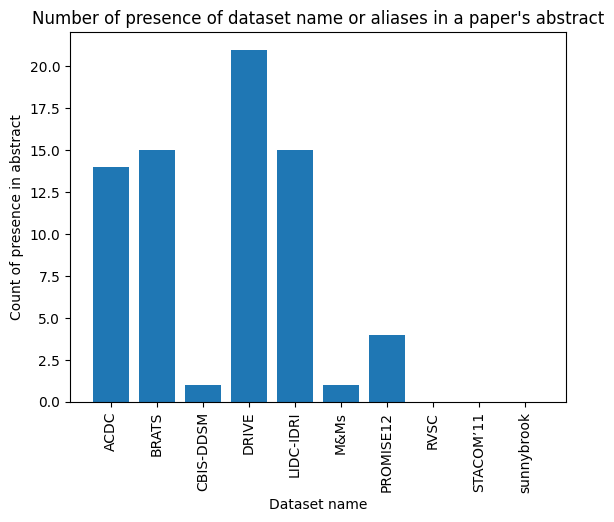

ACDC          14
BRATS         15
CBIS-DDSM      1
DRIVE         21
LIDC-IDRI     15
M&Ms           1
PROMISE12      4
RVSC           0
STACOM’11      0
sunnybrook     0
dtype: object

In [78]:
df_oa_abstract_toplot = df_oa_abstract_allInfo_name[df_oa_abstract_allInfo_name.columns.difference(['doi', 'name','venue','year'])]
plt.figure()
plt.bar(datasets_columns,df_oa_abstract_toplot.sum())
plt.xticks(datasets_columns, rotation='vertical')
plt.xlabel("Dataset name")
plt.ylabel("Count of presence in abstract")
plt.title("Number of presence of dataset name or aliases in a paper's abstract")
plt.show()
display(df_oa_abstract_toplot.sum())